In [263]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

In [264]:
#Variáveis de entrada
SCP = ctrl.Antecedent(np.arange(0, 11, 1), 'SCP')
VTP = ctrl.Antecedent(np.arange(0, 11, 1), 'VTP')
PVI = ctrl.Antecedent(np.arange(0, 11, 1), 'PVI')
SHV = ctrl.Antecedent(np.arange(0, 11, 1), 'SHV')
QPA = ctrl.Antecedent(np.arange(0, 11, 1), 'QPA')
TAR = ctrl.Antecedent(np.arange(0, 11, 1), 'TAR')
ATU = ctrl.Antecedent(np.arange(0, 11, 1), 'ATU')
NSR = ctrl.Antecedent(np.arange(0, 11, 1), 'NSR')
#Classe
satisfacao = ctrl.Consequent(np.arange(0,11,1), 'satisfacao')

In [265]:
#Função de pertinencia das variaveis de entrada
SCP['inferior'] = fuzz.trapmf(SCP.universe,(0,1,2,3+1))
SCP['medio'] = fuzz.trapmf(SCP.universe,(3, 4, 5, 6+1))
SCP['superior'] = fuzz.trapmf(SCP.universe,(6, 7, 8, 9+1))
VTP['inferior'] = fuzz.trapmf(VTP.universe,(0,1,2,3+1))
VTP['medio'] = fuzz.trapmf(VTP.universe,(3, 4, 5, 6+1))
VTP['superior'] = fuzz.trapmf(VTP.universe,(6, 7, 8, 9+1))
PVI['inferior'] = fuzz.trapmf(PVI.universe,(0,1,2,3+1))
PVI['medio'] = fuzz.trapmf(PVI.universe,(3, 4, 5, 6+1))
PVI['superior'] = fuzz.trapmf(PVI.universe,(6, 7, 8, 9+1))
SHV['inferior'] = fuzz.trapmf(SHV.universe,(0,1,2,3+1))
SHV['medio'] = fuzz.trapmf(SHV.universe,(3, 4, 5, 6+1))
SHV['superior'] = fuzz.trapmf(SHV.universe,(6, 7, 8, 9+1))
QPA['inferior'] = fuzz.trapmf(QPA.universe,(0,1,2,3+1))
QPA['medio'] = fuzz.trapmf(QPA.universe,(3, 4, 5, 6+1))
QPA['superior'] = fuzz.trapmf(QPA.universe,(6, 7, 8, 9+1))
TAR['inferior'] = fuzz.trapmf(TAR.universe,(0,1,2,3+1))
TAR['medio'] = fuzz.trapmf(TAR.universe,(3, 4, 5, 6+1))
TAR['superior'] = fuzz.trapmf(TAR.universe,(6, 7, 8, 9+1))
ATU['inferior'] = fuzz.trapmf(ATU.universe,(0,1,2,3+1))
ATU['medio'] = fuzz.trapmf(ATU.universe,(3, 4, 5, 6+1))
ATU['superior'] = fuzz.trapmf(ATU.universe,(6, 7, 8, 9+1))
NSR['inferior'] = fuzz.trapmf(NSR.universe,(0,1,2,3+1))
NSR['medio'] = fuzz.trapmf(NSR.universe,(3, 4, 5, 6+1))
NSR['superior'] = fuzz.trapmf(NSR.universe,(6, 7, 8, 9+1))

In [266]:
#Função de pertinencia da classe
satisfacao['baixo'] = fuzz.trapmf(satisfacao.universe,(0, 1, 2, 3+1))
satisfacao['medio'] = fuzz.trapmf(satisfacao.universe,(3, 4, 5, 6+1))
satisfacao['alto']  = fuzz.trapmf(satisfacao.universe,(6, 7, 8, 9+1))

/home/luciano/anaconda3/envs/my_env/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


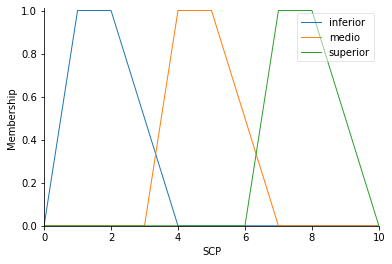

In [295]:
#Variavel de entrada - Sistema de Cobrança do Pedágio(SCP)
SCP.view()

/home/luciano/anaconda3/envs/my_env/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


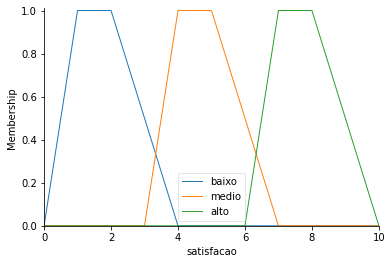

In [296]:
#Variavel de saída - Grau de Avaliação de Satisfação(GAS) 
satisfacao.view()

In [276]:
# Regras
regra1 = ctrl.Rule(SCP['inferior'] & NSR['inferior'], satisfacao['baixo'])
regra2 = ctrl.Rule(SCP['medio'] & NSR['medio'], satisfacao['medio'])
regra3 = ctrl.Rule(SCP['superior'] & NSR['superior'], satisfacao['alto'])

regra4 = ctrl.Rule(VTP['inferior'] & QPA['inferior'], satisfacao['baixo'])
regra5 = ctrl.Rule(VTP['medio'] & QPA['medio'], satisfacao['medio'])
regra6 = ctrl.Rule(VTP['superior'] & QPA['superior'], satisfacao['alto'])

regra7 = ctrl.Rule(ATU['inferior'] & PVI['inferior'], satisfacao['baixo'])
regra8 = ctrl.Rule(ATU['medio'] & PVI['medio'], satisfacao['medio'])
regra9 = ctrl.Rule(ATU['superior'] & PVI['superior'], satisfacao['alto'])

regra10 = ctrl.Rule(SHV['inferior'] & TAR['inferior'], satisfacao['baixo'])
regra11 = ctrl.Rule(SHV['medio'] & TAR['medio'], satisfacao['medio'])
regra12 = ctrl.Rule(SHV['superior'] & TAR['superior'], satisfacao['alto'])

regra13 = ctrl.Rule(SCP['inferior'] & NSR['superior'], satisfacao['medio'])
regra14 = ctrl.Rule(VTP['inferior'] & QPA['superior'], satisfacao['medio'])
regra15 = ctrl.Rule(ATU['inferior'] & PVI['superior'], satisfacao['medio'])
regra16 = ctrl.Rule(SHV['inferior'] & TAR['superior'], satisfacao['medio'])

regra13 = ctrl.Rule(SCP['superior'] | NSR['superior'], satisfacao['medio'])
regra14 = ctrl.Rule(VTP['superior'] | QPA['superior'], satisfacao['medio'])
regra15 = ctrl.Rule(ATU['superior'] | PVI['superior'], satisfacao['medio'])
regra16 = ctrl.Rule(SHV['superior'] | TAR['superior'], satisfacao['medio'])

In [289]:
#Controlador da lógica nebulosa das regras
ctr_r = ctrl.ControlSystem([regra1,regra2,regra3,regra4,
                            regra5,regra6,regra7,regra8,
                            regra9,regra10,regra11,regra12])

In [290]:
#Simulador do sistema fuzzy
control_regras = ctrl.ControlSystemSimulation(ctr_r)

In [291]:
#Entrada de valores para a simulação
control_regras.input['SCP'] = 4
control_regras.input['NSR'] = 4
control_regras.input['QPA'] = 3
control_regras.input['VTP'] = 4
control_regras.input['ATU'] = 9
control_regras.input['PVI'] = 7
control_regras.input['TAR'] = 7
control_regras.input['SHV'] = 5

In [292]:
#Computar o resultado
control_regras.compute()

6.0


/home/luciano/anaconda3/envs/my_env/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/luciano/anaconda3/envs/my_env/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/luciano/anaconda3/envs/my_env/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/luciano/anaconda3/envs/my_env/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figur

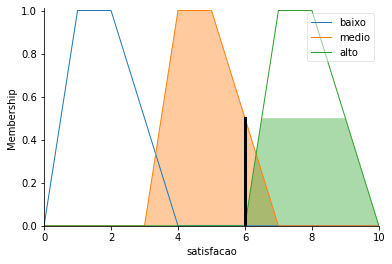

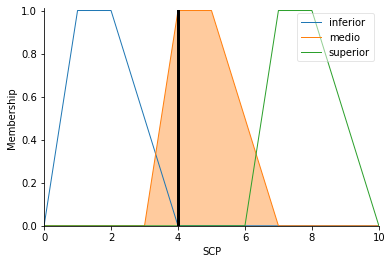

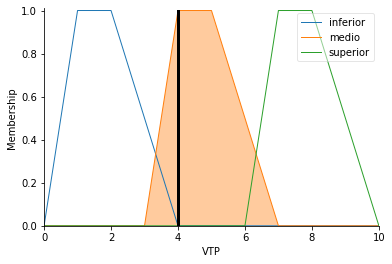

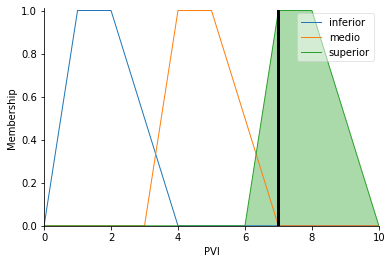

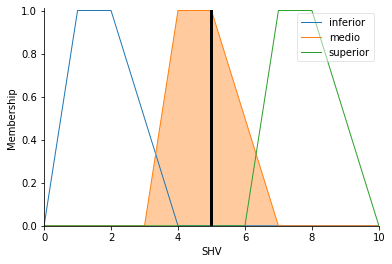

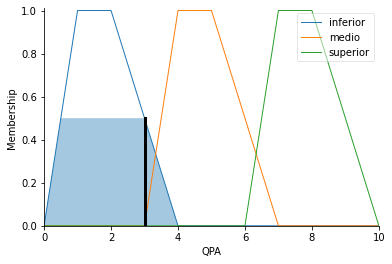

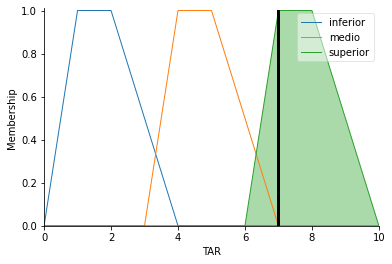

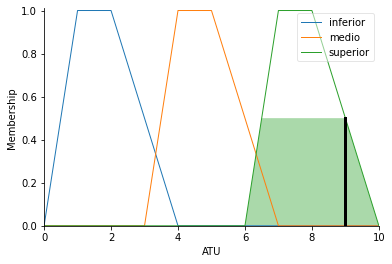

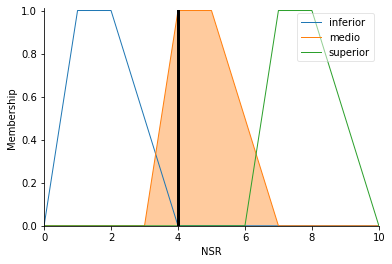

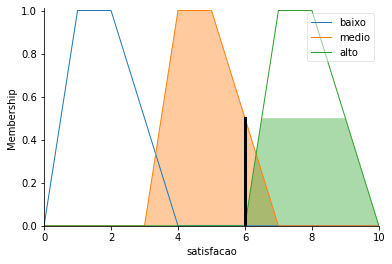

In [298]:
print(control_regras.output['satisfacao'])
satisfacao.view(sim=control_regras)
SCP.view(sim=control_regras)
VTP.view(sim=control_regras)
PVI.view(sim=control_regras)
SHV.view(sim=control_regras)
QPA.view(sim=control_regras)
TAR.view(sim=control_regras)
ATU.view(sim=control_regras)
NSR.view(sim=control_regras)